In [30]:
%matplotlib inline

In [31]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

from IPython.display import YouTubeVideo, display 

# Tensorflow와 Pytorch의 차이점

### 조원들과 토론 결론 

1. 정적 그래프(Static Graph)와  동적 그래프(Dynamic Graph)라는 아키텍쳐의 차이를 생각할 때, Tensorflow의 성능이 더 좋아야하지만, 실제 성능 평가에서는 큰 차이가 없거나 Pytorch가 더 좋은 성능을 내는 결과가 많다. Pytorch가 제한된 아키텍쳐 상에서 성능을 잘 뽑아내고 있는 것으로 파악된다

2. 허깅페이스 등에서 파이토치에 대한 지원이 더 잘 이루어지고, 파이토치로 구성된 논문 비율이 높아짐에 따라 리서치 부문에서는 파이토치의 필요성이 증대된 것으로 파악. 리서치 조직에서 구한 모델의 Weight를 머신러닝 엔지니어 팀이 텐서플로우로 이동시켜서 배포하는 사례가 왕왕 있음

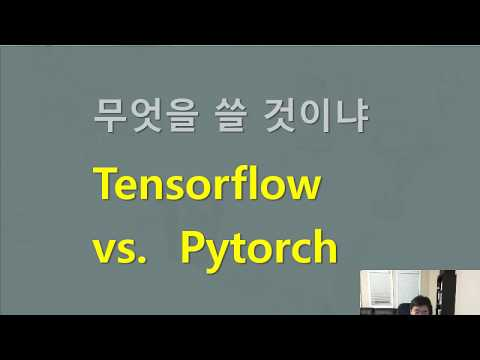

In [ ]:
video = YouTubeVideo("tNWatDufzDk", width=500)
display(video)


Tensorflow : **구글** 
Pytorch : **페이스북**

**It`s becoming clear that people use Tensorflow for work and Pytorch for fun.**

Static vs Dynamic
RNN은 시퀀스 입력이라 이론상 어느 Length든 상관없지만, 
실제적으로 우리가 코드를 작성할 때, Max Length를 정해서 
Fixed Length(고정된 길이)의 Input으로 만들어서 학습을 진행한다. 
이것은 바로 Input의 길이를 한 번 정하면 수정할 수 없는 Tensorflow의 Static한 특성 때문이다.  
하지만 Pytorch는 Max length  정할 필요없이 다양한 길이의 Input을 받을 수 있다고 한다. 

Tensorflow는 한번 Compile되고 학습이 시작되면  중간에 바꾸는 것이 어렵지만, 
Pytorch는 학습이 시작되고 나서도 중간에 바꾸는 것이 수월하다고 한다. 

Tensorflow는 상대적으로 Low-level (조정할 수 있는 파라미터가 다양, 자유도가 높다)
Pytorch는 상대적으로 High-level (세세한 것보다 전체적인 얼개를 빠르게 구성할 수 있다. Productive하다, 프로토타입을 빠르게 만들 수 있다)


Pytorch는 완성된 딥러닝 모델을 Serving하는 것에 장점을 가지고 있고, 
특히, 핸드폰 같은 모바일 기기에서 딥러닝 모델을 Serving하는 API등이 잘 준비되어 있다. 
CVPR 등 유명 딥러닝 학회의 논문 상당수가 Pytorch를 바탕으로 하고 있다. 
따라서, SOTA 논문을 빠르게 구현하는데 Pytorch를 알면 도움이 된다

성급한 결론: 둘 다 잘하면 좋다

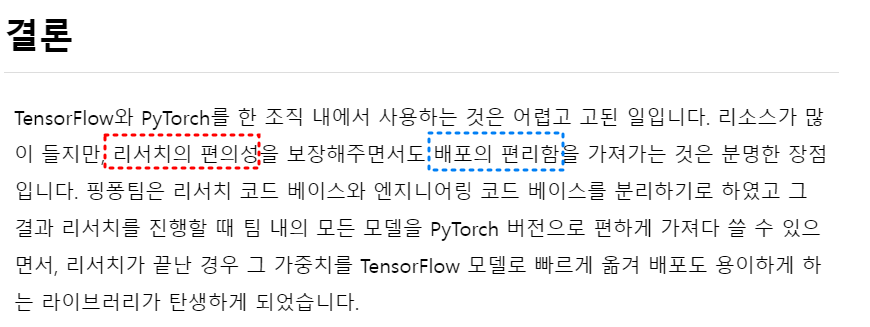

In [ ]:
# Public 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root="data", # root : Mnist Data가 어디에 다운로드 받을지
    train=True,  # train : Mnist의 TrainSet을 불러온다. 
    download=True,
    transform=ToTensor()  # Mnist 이미지들을 불러올 때, 어떤 Transform을 적용해서 불러올지
)

'''
일반적인 이미지는 0~255의 값을 가지고, Height-Width-Channel 순서대로 이루어져 있다. 
반면, Pytorch에서 이미지는 0~1사이의 값을 가지게 되고, 순서는 C-H-W (Channel-Height-Width)
따라서 이러한 형태로 변환을 위해 ToTensor()가 사용된다. 
'''

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,  # Mnist의 TestSet을 불러온다. 
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



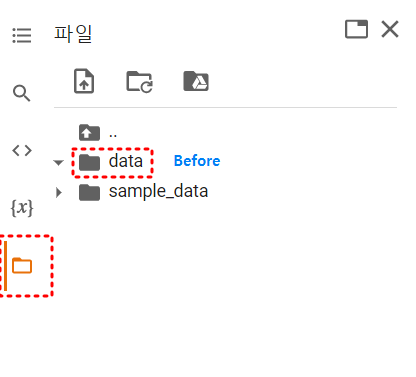

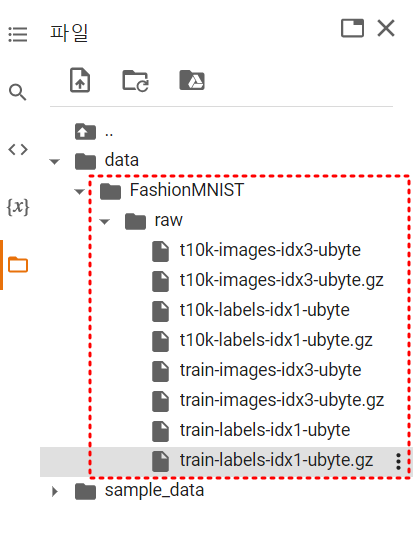

In [ ]:
batch_size = 64

# 데이터로더를 생성합니다.
# 실제 학습데이터 활용을 위한 장치
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W], : ", X.shape) 
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W], :  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


------------------------------------------------------------------------------------------




모델 만들기
------------------------------------------------------------------------------------------


In [ ]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
# 조건을 만족하면 "cuda"라는 문자열이 device에 할당 
# 그렇지 않다면, "cpu"라는 문자열이 할당 

print(f"Using {device} device")

# 모델을 정의합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()  # super(keras.Model)
        self.flatten = nn.Flatten()  # tf.keras.layers.Flatten(): [28 x 28] -> 784
        # tf.keras.Sequential()
        self.linear_relu_stack = nn.Sequential(  
            nn.Linear(28*28, 512), # tf.keras.activations.linear
            nn.ReLU(), # tf.keras.layers.ReLU
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)  # 최종 Output은 FashionMnist 데이터의 10개 레이블 
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)  
# to() 메소드 
# 기본적으로 텐서는 CPU에 생성된다. 
# Tensor 연산 속도를 높이기 위해 to() 메소드를 사용한다
# GPU가 존재하면 Tensor를 이동한다. 


print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


------------------------------------------------------------------------------------------




모델 매개변수 최적화하기
------------------------------------------------------------------------------------------


In [ ]:
loss_fn = nn.CrossEntropyLoss()  # Pytorch에서 CrossEntropy안에서 Softmax 확률이 같이 계산된다.

# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # X : 이미지 
        # y : 레이블 
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파

        # Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문"에 
        # 우리는 항상 backpropagation을 하기전에 gradients를 zero로 만들어주고 시작을 해야
        optimizer.zero_grad()

        # forward 함수만 정의하게 되면, (변화도를 계산하는) backward 함수는 autograd 를 사용하여 자동으로 정의
        loss.backward()

        # 역전파 단계에서 수집된 변화도로 매개변수를 조정
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() 
            # TORCH.TENSOR.item()
            # 하나의 요소로 구성된 Tensor의 값을 반환

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
x와 y의 type <class 'torch.Tensor'>
loss: 2.294204  [    0/60000]
loss: 2.288804  [ 6400/60000]
loss: 2.266750  [12800/60000]
loss: 2.262477  [19200/60000]
loss: 2.252099  [25600/60000]
loss: 2.209102  [32000/60000]
loss: 2.222917  [38400/60000]
loss: 2.189655  [44800/60000]
loss: 2.184793  [51200/60000]
loss: 2.151818  [57600/60000]
Test Error: 
 Accuracy: 46.2%, Avg loss: 2.146211 

Epoch 2
-------------------------------
x와 y의 type <class 'torch.Tensor'>
loss: 2.150743  [    0/60000]
loss: 2.145124  [ 6400/60000]
loss: 2.083816  [12800/60000]
loss: 2.104188  [19200/60000]
loss: 2.056058  [25600/60000]
loss: 1.989119  [32000/60000]
loss: 2.020625  [38400/60000]
loss: 1.942792  [44800/60000]
loss: 1.944974  [51200/60000]
loss: 1.873130  [57600/60000]
Test Error: 
 Accuracy: 60.2%, Avg loss: 1.865647 

Epoch 3
-------------------------------
x와 y의 type <class 'torch.Tensor'>
loss: 1.892305  [    0/60000]
loss: 1.864423  [ 6400/60000]
loss: 1.741829

------------------------------------------------------------------------------------------




모델 저장하기
------------------------------------------------------------------------------------------




In [ ]:
torch.save(model.state_dict(), "model.pth")

# state_dict()
# 각 레이어마다의 매개변수를 tensor형태로 매핑해서 dictionary형태로 저장

print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


모델 불러오기
------------------------------------------------------------------------------------------

모델을 불러오는 과정에는 모델 구조를 다시 만들고 상태 사전을 모델에 불러오는 과정이 포함됩니다.



In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

이제 이 모델을 사용해서 예측을 할 수 있습니다.



In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]

# torch.no_grad()
# gradient 연산 없이 Forward Pass 진행
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

# **참고자료**

**Pytorch vs Tensorflow 비교**
https://data-newbie.tistory.com/425

**Deploying Tensorflow 2.0 with REST API**
https://www.youtube.com/watch?v=zpYAQIA1z4Y

**Tensorflow vs Pytorch 명령어 비교**
https://bladejun.tistory.com/145?category=481262

**하나의 조직에서 TensorFlow와 PyTorch 동시 활용하기**
https://blog.pingpong.us/torch-to-tf-tf-to-torch/



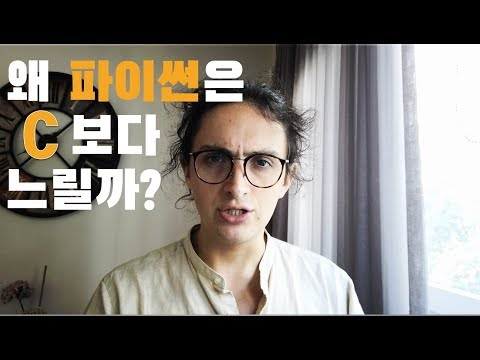

In [ ]:
video = YouTubeVideo("9sSxdhYGYSM", width=500)
display(video)